In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import tqdm

### Importing Data

In [3]:
df = pd.read_csv('Mall_Customers.csv')

### Data Preprocessing

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(['CustomerID'],axis = 1,inplace = True)

In [6]:
df = pd.get_dummies(df, columns=['Gender'],drop_first = True)

In [7]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


### Normalization

In [8]:
df['Age'] = (df['Age'] - df['Age'].mean())/(df['Age'].std())
df['Annual Income (k$)'] = (df['Annual Income (k$)'] - df['Annual Income (k$)'].mean())/(df['Annual Income (k$)'].std())
df['Spending Score (1-100)'] = (df['Spending Score (1-100)'] - df['Spending Score (1-100)'].mean())/(df['Spending Score (1-100)'].std() )
df['Gender_Male'] = (df['Gender_Male'] - df['Gender_Male'].mean())/(df['Gender_Male'].std())

In [9]:
df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.421003,-1.734646,-0.433713,1.125328
1,-1.277829,-1.734646,1.192711,1.125328
2,-1.349416,-1.696572,-1.711618,-0.884186
3,-1.134655,-1.696572,1.037814,-0.884186
4,-0.561958,-1.658498,-0.394989,-0.884186
...,...,...,...,...
195,-0.275610,2.263112,1.115262,-0.884186
196,0.440260,2.491555,-0.859681,-0.884186
197,-0.490371,2.491555,0.921640,1.125328
198,-0.490371,2.910368,-1.246925,1.125328


In [18]:
# Applying PCA to convert the dimensionality to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
df = pca.transform(df)

Elbow Method to determine the number of clusters to be formed:


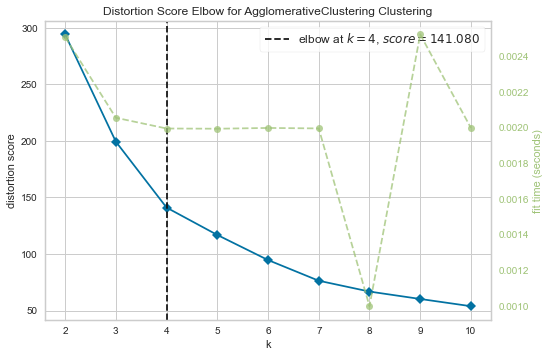

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=10)
Elbow_M.fit(df)
Elbow_M.show()

In [20]:
clusters = AgglomerativeClustering(n_clusters = 4).fit(df)

In [23]:
print(clusters.labels_)

[2 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 2 1 2 2 2 1 2 2 2 1 0 1 0 1 2 1 2
 1 2 1 2 1 0 2 2 1 2 2 2 2 2 2 2 0 2 0 2 0 2 0 0 1 2 2 0 1 2 2 1 2 0 2 2 2
 0 3 2 0 1 2 0 0 0 2 1 0 2 1 2 2 0 3 0 2 2 3 2 2 0 3 2 2 0 3 0 2 0 0 0 0 0
 1 2 3 1 1 0 2 2 2 3 2 2 3 2 1 0 3 0 3 0 3 2 1 0 1 0 3 0 1 0 3 2 1 0 3 0 1
 0 3 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


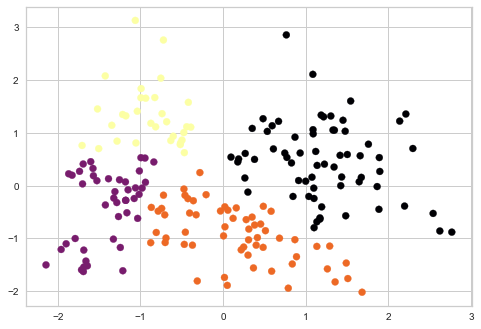

In [29]:
plt.scatter(df[:,0],df[:,1],c = clusters.labels_,cmap = 'inferno')

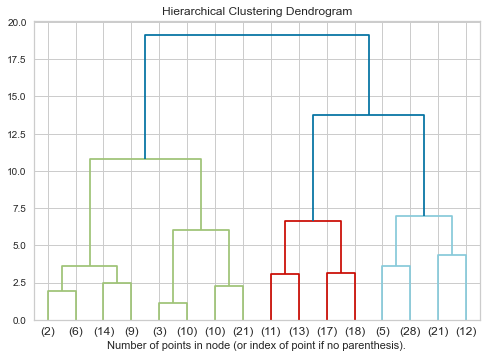

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()